<a href="https://colab.research.google.com/github/aruaru0/keras-sample/blob/main/keras_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install icrawler
# # !pip install tensorflow-io

In [2]:
# from icrawler.builtin import GoogleImageCrawler

## データの準備

In [3]:
# https://www.microsoft.com/en-us/download/details.aspx?id=54765
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-02-13 05:04:25--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.44.78.15, 2600:1407:7400:481::317f, 2600:1407:7400:489::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.44.78.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  66.4MB/s    in 9.6s    

2024-02-13 05:04:35 (81.8 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [4]:
!unzip kagglecatsanddogs_5340.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetIm

In [5]:
!mkdir images images/train images/valid images/train/cat images/train/dog images/valid/cat images/valid/dog
!cp PetImages/Cat/??.jpg images/valid/cat
!cp PetImages/Dog/??.jpg images/valid/dog
!cp PetImages/Cat/???.jpg images/train/cat
!cp PetImages/Dog/???.jpg images/train/dog
!rm images/train/cat/666.jpg

In [6]:
# import keras

# 画像の準備

In [7]:
# google_crawler = GoogleImageCrawler(
#     storage={'root_dir': 'images/dog'})
# google_crawler.crawl(keyword='dog', max_num=100)

In [8]:
# google_crawler = GoogleImageCrawler(
#     storage={'root_dir': 'images/cat'})
# google_crawler.crawl(keyword='cat', max_num=100)

In [9]:
# !mkdir images/train images/valid images/train/cat images/train/dog images/valid/cat images/valid/dog
# !mv images/cat/00000?.jpg images/valid/cat
# !mv images/dog/00000?.jpg images/valid/dog
# !mv images/cat images/train
# !mv images/dog images/train

In [10]:
# !rm images/train/cat/*.png
# !rm images/train/dog/*.png
# !rm images/valid/cat/*.png
# !rm images/valid/dog/*.png

# 学習

In [11]:
import os
import random
import glob
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
classes = ['cat','dog']
nb_classes = len(classes)

#train val dir
train_dir = './images/train'
val_dir = './images/valid'
model_dir = './model'

# train_samples = glob.glob(train_dir + '/*/*.jpg')
# val_samples = glob.glob(val_dir + '/*/*.jpg')
# train_samples = len(train_samples)
# val_samples = len(val_samples)
# print(train_samples)
# print(val_samples)

In [13]:
img_w, img_h = 224,224
batch_size = 16

# train_datagen = ImageDataGenerator(
#                                    rescale = 1.0/255,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    # vertical_flip = True,
    horizontal_flip = True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05
    )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_h,img_w),
    # keep_aspect_ratio = True,
    color_mode = 'rgb',
    classes = classes,
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
)


val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    # vertical_flip = True,
    # horizontal_flip = True,
    # rotation_range=20,
    # zoom_range=0.2,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.05
    )

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_h,img_w),
    # keep_aspect_ratio = True,
    color_mode = 'rgb',
    classes = classes,
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = False
)

Found 1799 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [14]:
train_generator.class_indices, validation_generator.class_indices

({'cat': 0, 'dog': 1}, {'cat': 0, 'dog': 1})

In [15]:
# files = glob.glob("./images/train/*/*.jpg")
# import tensorflow as tf

# for file in files:
#   print(file)
#   img = tf.io.read_file(file)
#   tf.image.decode_image(img)

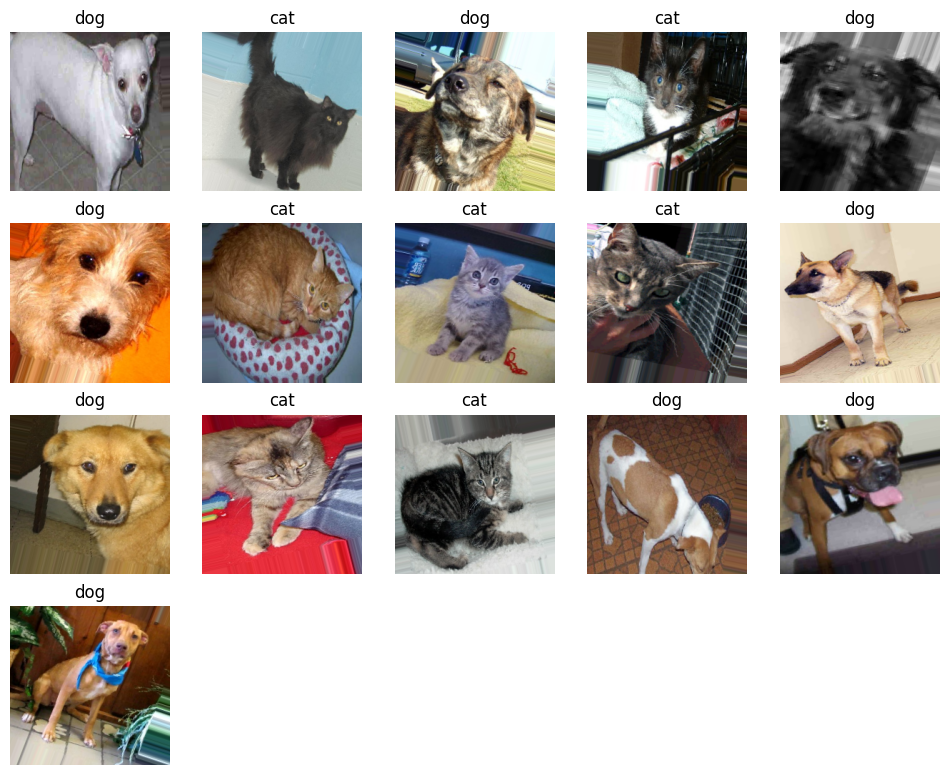

In [16]:
items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i in range(len(items[1])):
  plt.subplot(5,5,i+1)
  plt.imshow(items[0][i])
  label = classes[int(np.argmax(items[1][i]))]
  plt.title(label)
  plt.axis('off')

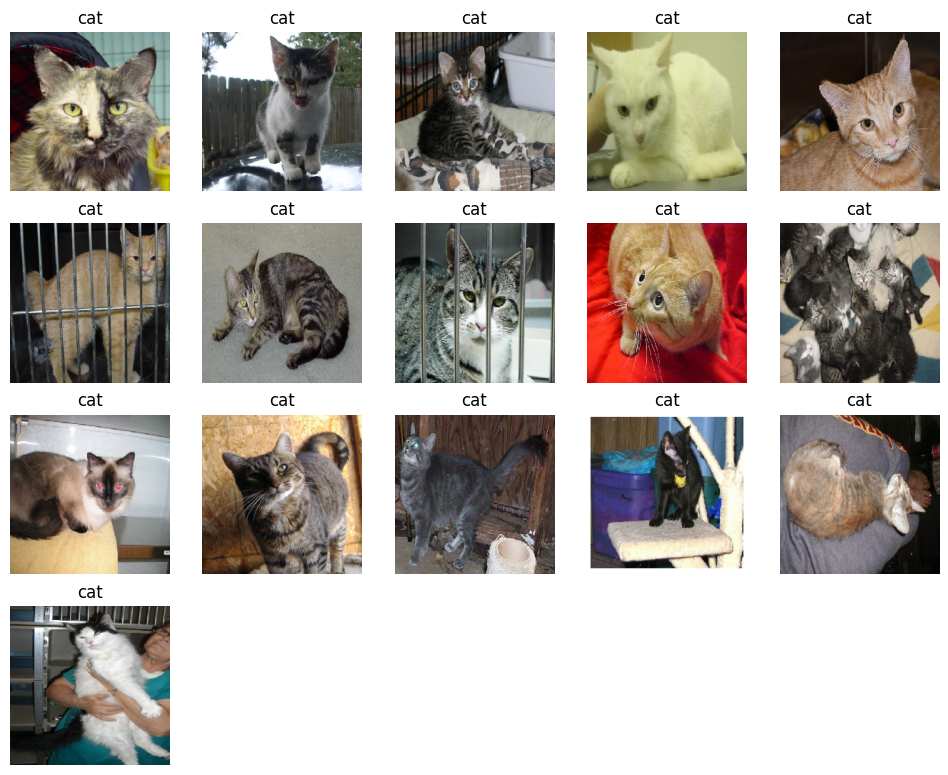

In [17]:
items = next(iter(validation_generator))

plt.figure(figsize=(12,12))
for i in range(len(items[1])):
  plt.subplot(5,5,i+1)
  plt.imshow(items[0][i])
  label = classes[int(np.argmax(items[1][i]))]
  plt.title(label)
  plt.axis('off')

## 追加したレイヤーだけ学習

In [18]:
checkpoint = ModelCheckpoint(
    filepath = os.path.join(
        model_dir,
        'model_{epoch:02d}.hdf5'
    ),
    save_best_only=True
)
early_stopping = EarlyStopping(monitor='val_loss',patience=3,verbose=0,mode='auto')

In [19]:
input_tensor = Input(shape=(img_h,img_w,3))

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_tensor,
    # input_shape=(img_h, img_w, 3),
)

# base_model = EfficientNetB0(
#     weights='imagenet',
#     include_top=False,
#     input_tensor=input_tensor,
#     )

    # input_tensor=input_tensor)

# for layer in base_model.layers:
#     layer.trainable = True
base_model.trainable = False


# x = Flatten()(base_model.output)
# x = Dense(256,activation='relu')(x)

x = GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = BatchNormalization()(x)
top_dropout_rate = 0.2
x = Dropout(top_dropout_rate, name="top_dropout")(x)
output_tensor = Dense(2,activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output_tensor)

# for l in model.layers[-14:]:
#   l.trainable = True


# for l in model.layers[-10:]:
#     if not isinstance(l, BatchNormalization):
#         l.trainable = True
#     else:
#         print(l.name, l.trainable)


# for l in model.layers:
#     print(l.name, l.trainable)

# for layer in model.layers:
#     layer.trainable = True
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [20]:
!rm model/*

epochs = 20
train_step_size = train_generator.n // train_generator.batch_size
valid_step_size = validation_generator.n // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=train_step_size,
    validation_data=validation_generator,
    validation_steps=valid_step_size,
    epochs=epochs,
    verbose=1,
    callbacks=[checkpoint]#, early_stopping]
)

rm: cannot remove 'model/*': No such file or directory
Epoch 1/20
112/112 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.6007

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


112/112 [==============================] - 36s 244ms/step - loss: 0.6854 - accuracy: 0.6007 - val_loss: 0.6951 - val_accuracy: 0.4830
Epoch 2/20
112/112 [==============================] - 26s 234ms/step - loss: 0.6599 - accuracy: 0.6181 - val_loss: 0.6796 - val_accuracy: 0.6136
Epoch 3/20
112/112 [==============================] - 27s 238ms/step - loss: 0.6384 - accuracy: 0.6422 - val_loss: 0.6621 - val_accuracy: 0.6420
Epoch 4/20
112/112 [==============================] - 26s 231ms/step - loss: 0.6344 - accuracy: 0.6528 - val_loss: 0.6562 - val_accuracy: 0.6307
Epoch 5/20
112/112 [==============================] - 26s 235ms/step - loss: 0.6147 - accuracy: 0.6629 - val_loss: 0.6195 - val_accuracy: 0.6705
Epoch 6/20
112/112 [==============================] - 27s 239ms/step - loss: 0.6233 - accuracy: 0.6635 - val_loss: 0.6123 - val_accuracy: 0.6648
Epoch 7/20
112/112 [==============================] - 26s 236ms/step - loss: 0.6053 - accuracy: 0.6764 - val_loss: 0.6378 - val_accuracy: 0.6

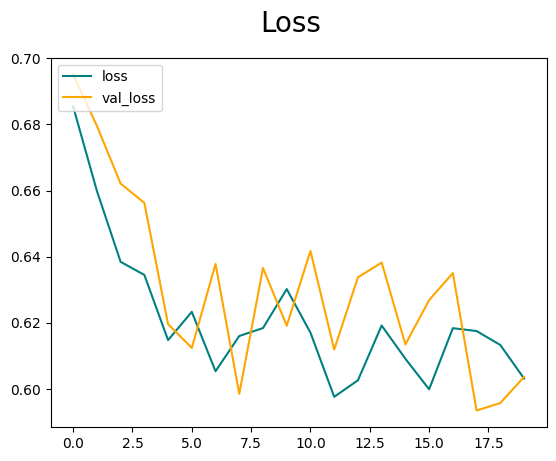

In [21]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

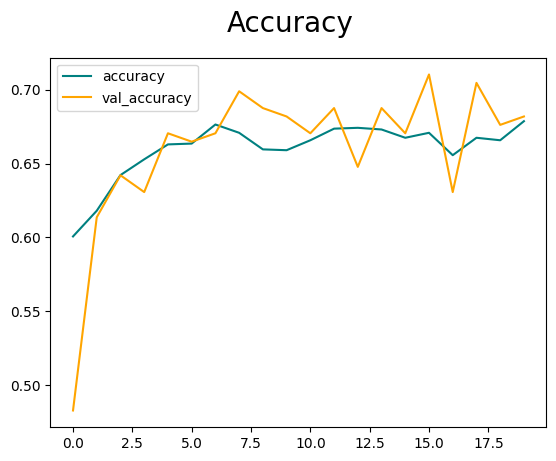

In [22]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 追加したレイヤーと、一部レイヤーを学習

In [23]:
input_tensor = Input(shape=(img_h,img_w,3))

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_tensor,
    # input_shape=(img_h, img_w, 3),
)

# base_model = EfficientNetB0(
#     weights='imagenet',
#     include_top=False,
#     input_tensor=input_tensor,
#     )

    # input_tensor=input_tensor)

# for layer in base_model.layers:
#     layer.trainable = True
base_model.trainable = False


# x = Flatten()(base_model.output)
# x = Dense(256,activation='relu')(x)

x = GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = BatchNormalization()(x)
top_dropout_rate = 0.2
x = Dropout(top_dropout_rate, name="top_dropout")(x)
output_tensor = Dense(2,activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output_tensor)

for l in model.layers[-14:]:
  l.trainable = True


# for l in model.layers[-10:]:
#     if not isinstance(l, BatchNormalization):
#         l.trainable = True
#     else:
#         print(l.name, l.trainable)


# for l in model.layers:
#     print(l.name, l.trainable)

# for layer in model.layers:
#     layer.trainable = True
optimizer = keras.optimizers.Adam(learning_rate=1e-5)

model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [24]:
checkpoint = ModelCheckpoint(
    filepath = os.path.join(
        model_dir,
        'model_{epoch:02d}.hdf5'
    ),
    save_best_only=True
)

Epoch 1/20
112/112 [==============================] - 34s 248ms/step - loss: 0.8013 - accuracy: 0.5878 - val_loss: 0.7264 - val_accuracy: 0.4886
Epoch 2/20
112/112 [==============================] - 26s 234ms/step - loss: 0.7271 - accuracy: 0.6254 - val_loss: 0.6822 - val_accuracy: 0.6080
Epoch 3/20
112/112 [==============================] - 31s 276ms/step - loss: 0.7065 - accuracy: 0.6321 - val_loss: 0.6700 - val_accuracy: 0.6136
Epoch 4/20
112/112 [==============================] - 26s 236ms/step - loss: 0.7029 - accuracy: 0.6500 - val_loss: 0.6411 - val_accuracy: 0.6705
Epoch 5/20
112/112 [==============================] - 26s 231ms/step - loss: 0.6522 - accuracy: 0.6511 - val_loss: 0.6476 - val_accuracy: 0.6250
Epoch 6/20
112/112 [==============================] - 28s 248ms/step - loss: 0.6661 - accuracy: 0.6680 - val_loss: 0.6434 - val_accuracy: 0.6591
Epoch 7/20
112/112 [==============================] - 28s 251ms/step - loss: 0.6345 - accuracy: 0.6730 - val_loss: 0.6416 - val_ac

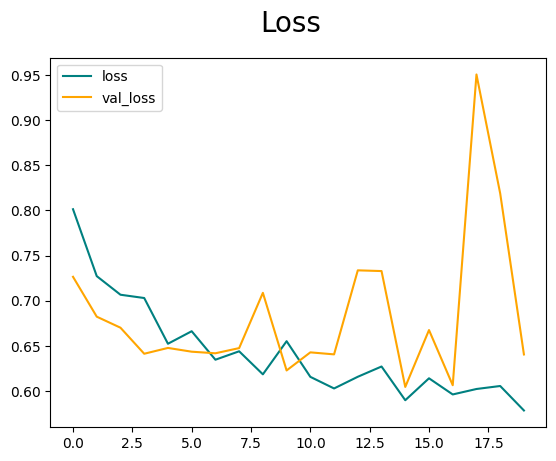

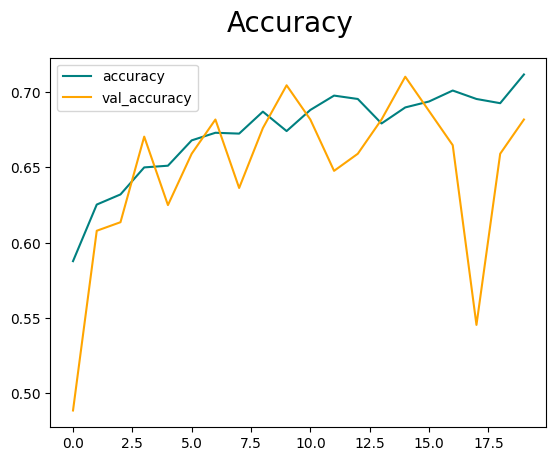

In [25]:
!rm model/*

epochs = 20
train_step_size = train_generator.n // train_generator.batch_size
valid_step_size = validation_generator.n // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=train_step_size,
    validation_data=validation_generator,
    validation_steps=valid_step_size,
    epochs=epochs,
    verbose=1,
    callbacks=[checkpoint]#, early_stopping]
)

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
model_name = sorted(glob.glob("./model/*"))[-1]
print(model_name)

./model/model_15.hdf5


['./images/valid/cat/24.jpg', './images/valid/cat/27.jpg', './images/valid/cat/28.jpg', './images/valid/cat/29.jpg', './images/valid/cat/21.jpg', './images/valid/cat/20.jpg', './images/valid/cat/22.jpg', './images/valid/cat/23.jpg', './images/valid/cat/26.jpg', './images/valid/cat/25.jpg', './images/valid/dog/24.jpg', './images/valid/dog/27.jpg', './images/valid/dog/28.jpg', './images/valid/dog/29.jpg', './images/valid/dog/21.jpg', './images/valid/dog/20.jpg', './images/valid/dog/22.jpg', './images/valid/dog/23.jpg', './images/valid/dog/26.jpg', './images/valid/dog/25.jpg']


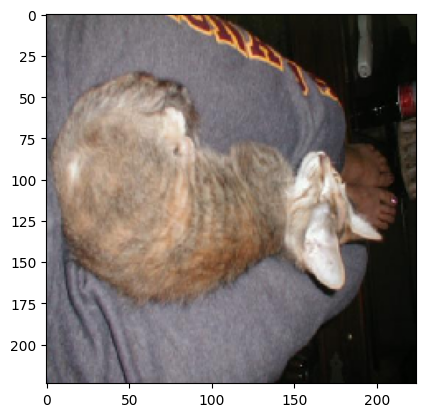

./images/valid/cat/24.jpg
1/1 [==============================] - 2s 2s/step
[[0.95921    0.04079004]] cat





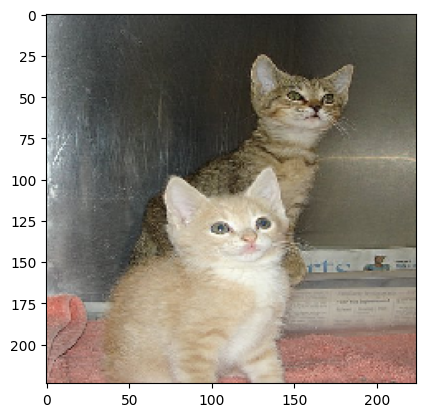

./images/valid/cat/27.jpg
1/1 [==============================] - 0s 28ms/step
[[0.855401 0.144599]] cat





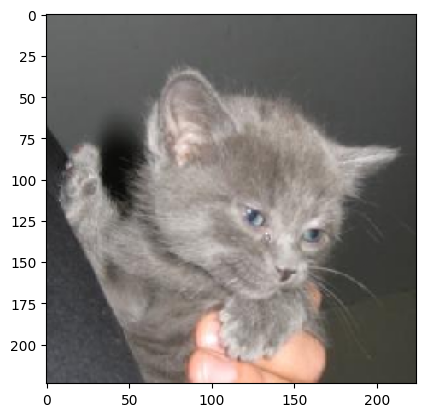

./images/valid/cat/28.jpg
1/1 [==============================] - 0s 22ms/step
[[0.8224007  0.17759933]] cat





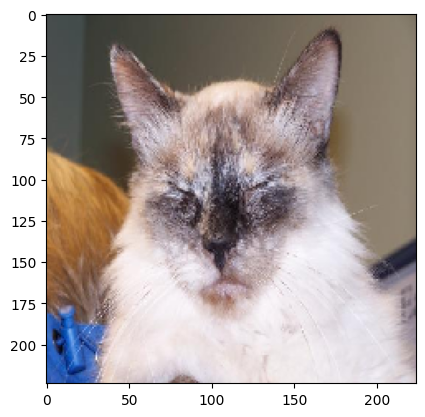

./images/valid/cat/29.jpg
1/1 [==============================] - 0s 23ms/step
[[0.6799959  0.32000414]] cat





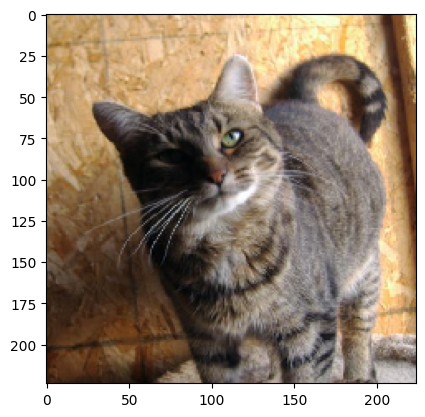

./images/valid/cat/21.jpg
1/1 [==============================] - 0s 33ms/step
[[0.65801114 0.34198883]] cat





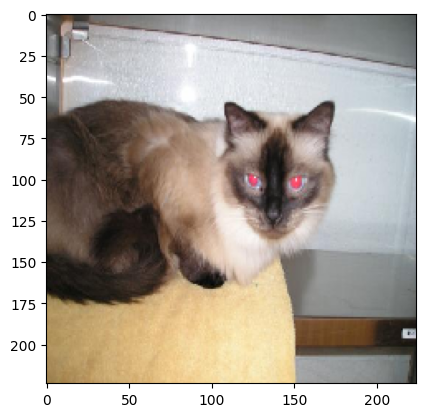

./images/valid/cat/20.jpg
1/1 [==============================] - 0s 25ms/step
[[0.5253927  0.47460732]] cat





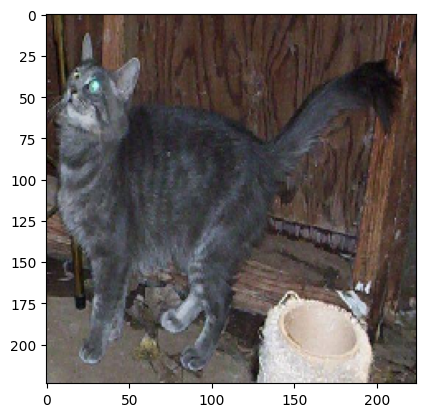

./images/valid/cat/22.jpg
1/1 [==============================] - 0s 29ms/step
[[0.5177563  0.48224372]] cat





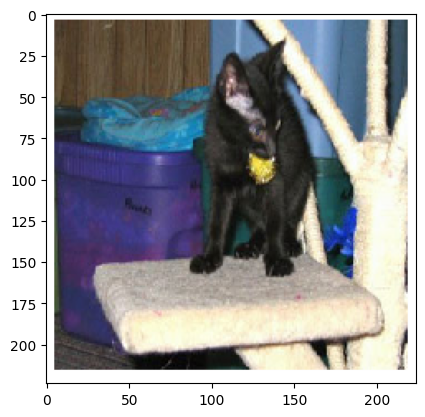

./images/valid/cat/23.jpg
1/1 [==============================] - 0s 32ms/step
[[0.5013342 0.4986658]] cat





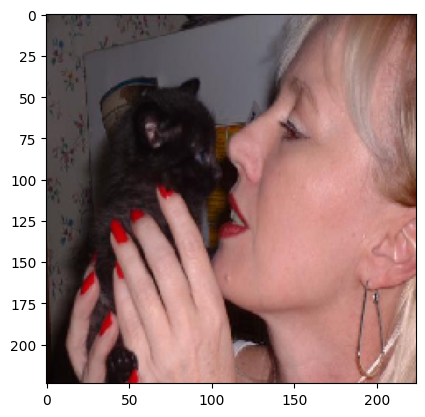

./images/valid/cat/26.jpg
1/1 [==============================] - 0s 26ms/step
[[0.09034362 0.90965635]] dog





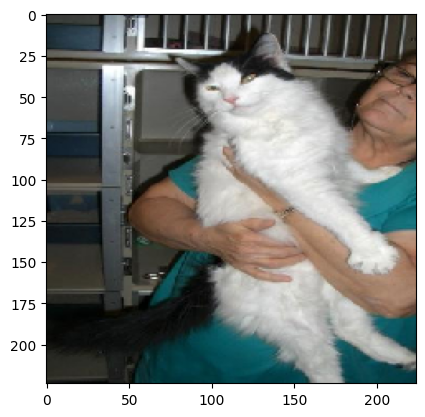

./images/valid/cat/25.jpg
1/1 [==============================] - 0s 26ms/step
[[0.96934557 0.03065445]] cat





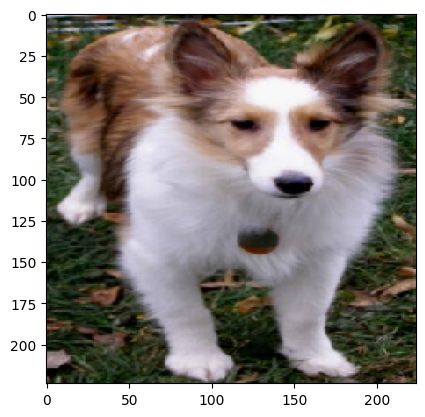

./images/valid/dog/24.jpg
1/1 [==============================] - 0s 34ms/step
[[0.16569908 0.83430094]] dog





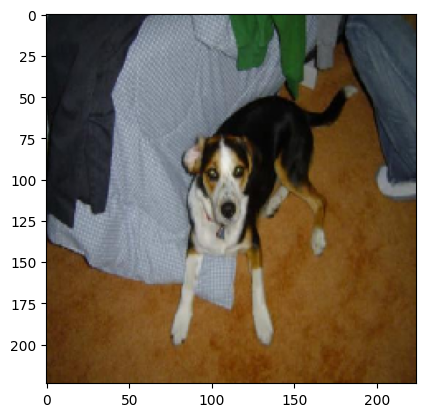

./images/valid/dog/27.jpg
1/1 [==============================] - 0s 27ms/step
[[0.43317592 0.566824  ]] dog





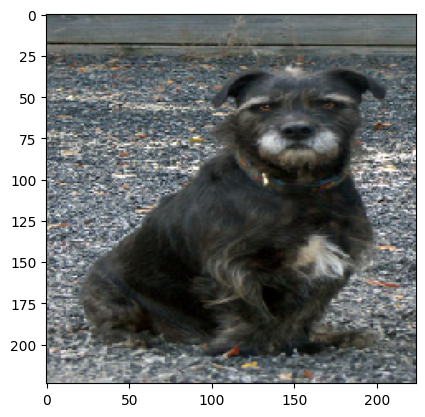

./images/valid/dog/28.jpg
1/1 [==============================] - 0s 23ms/step
[[0.27998027 0.72001976]] dog





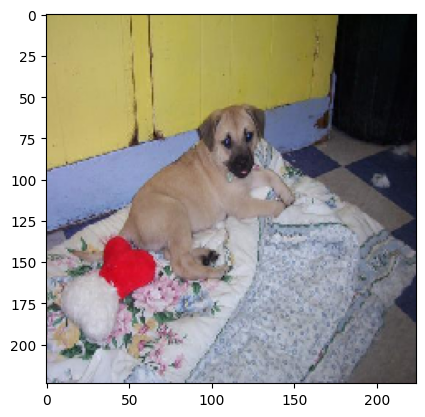

./images/valid/dog/29.jpg
1/1 [==============================] - 0s 37ms/step
[[0.62159616 0.3784038 ]] cat





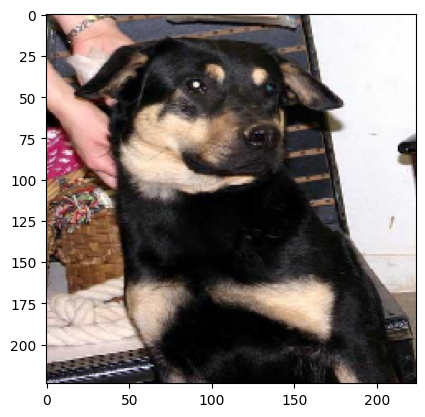

./images/valid/dog/21.jpg
1/1 [==============================] - 0s 34ms/step
[[0.51204586 0.48795414]] cat





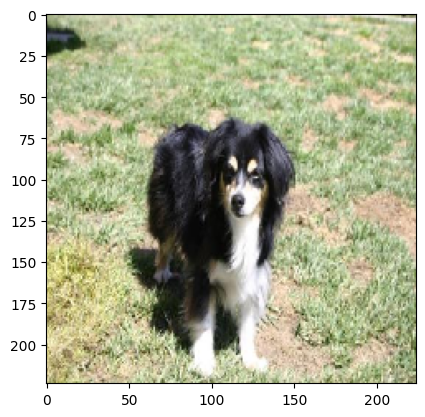

./images/valid/dog/20.jpg
1/1 [==============================] - 0s 32ms/step
[[0.04297924 0.9570208 ]] dog





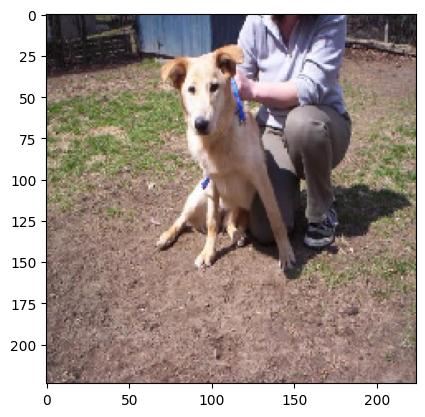

./images/valid/dog/22.jpg
1/1 [==============================] - 0s 35ms/step
[[0.3199077 0.6800923]] dog





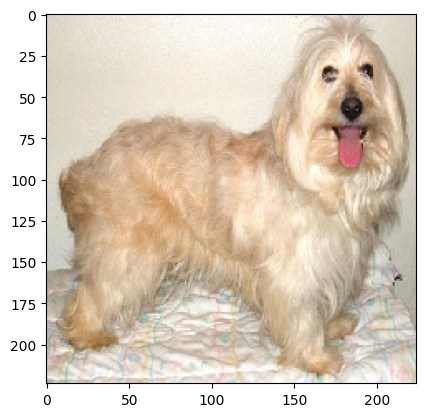

./images/valid/dog/23.jpg
1/1 [==============================] - 0s 39ms/step
[[0.6651164 0.3348836]] cat





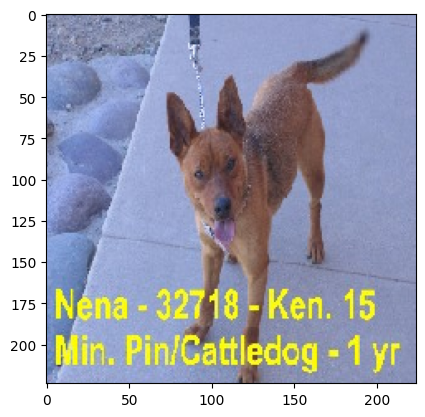

./images/valid/dog/26.jpg
1/1 [==============================] - 0s 35ms/step
[[0.280537   0.71946305]] dog





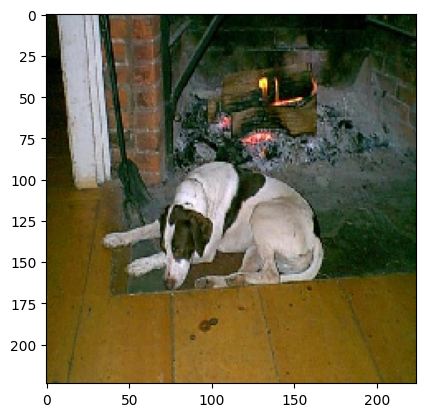

./images/valid/dog/25.jpg
1/1 [==============================] - 0s 45ms/step
[[0.66987246 0.3301275 ]] cat





In [27]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import glob
import matplotlib.pyplot as plt

#test and model dir
test_dir = './images/valid'
model_dir = './model'

#num samples
test_samples = glob.glob(test_dir + '/*/2?.jpg')
print(test_samples)

#img size
img_w, img_h = 224,224

###model###
model = load_model(model_name)

for file in test_samples:
    img = load_img(file,color_mode='rgb',target_size=(img_h,img_w))
    img = img_to_array(img)/255.0
    plt.imshow(img)
    plt.show()
    img = np.expand_dims(img,axis=0)

    print(file)
    predict = model.predict(img)
    print(predict, classes[np.argmax(predict)])
    print("\n\n")

